In [1]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import scipy.io as scio
import pandas
from scipy.stats import pearsonr
from progressbar import progressbar

In [2]:
def statenum(i):
    switcher={
            'S1':1,
            'systole':2,
            'S2':3,
            'diastole':4,
             }
    return switcher.get(i,0)

def get_states(seg_data):
    indexList = seg_data['index']
    stateList = seg_data['state_name']
    size = indexList[-1]

    states = []
    j = 1
    for i in range(size):
        states.append(statenum(stateList[j-1]))
        if (i == indexList[j]):
            if (j<indexList.size-1):
                j += 1
            else:
                j = indexList.size-1

    return np.array(states)

def get_states_mat(MATLAB_seg_data, key):
    indexList = np.floor(MATLAB_seg_data[key][:,0])
    stateList = MATLAB_seg_data[key][:,1]
    size = indexList[-1]

    MATLABstates = []
    j = 1
    for i in range(size):
        MATLABstates.append(statenum(stateList[j-1]))
        if (i == indexList[j]):
            if (j<indexList.size-1):
                j += 1
            else:
                j = indexList.size-1

    return np.array(MATLABstates)

In [4]:
## Define os paths
Root = '/media/linse/DADOS/stevan/datasets/heart-sound'
Root = pathlib.Path(Root)

inputPath = Root/'python_segmentation/'

segPath1 = Root/'extra_data/hand_corrected_annotations_training/'
segPath2 = Root/'extra_data/automated_Springer_annotations_training/'

figsPath = '/home/linse/stevan/Qualirede/segmentador/figures'
figsPath = pathlib.Path(figsPath)

metadataPath = '/media/linse/DADOS/stevan/datasets/heart-sound/training/metadata.csv'
df = pandas.read_csv(metadataPath)
record_name = df['record_name']

## Coloca as listas em ordem alfabética
folderList = sorted(list(inputPath.glob('training*')))
segFolderList1 = sorted(list(segPath1.glob('training*')))
segFolderList2 = sorted(list(segPath2.glob('training*')))

r_list = []

# 'training-a/', 'training-b/', 'training-c/', 'training-d/', 'training-e/', 'training-f/'
j = 0
for i in range(len(folderList)):
    
    folderName = folderList[i].name
    
    inFolder = inputPath / folderName
    
    segInFolder1 = segPath1 / folderName
    folderName = folderName + '-Aut'
    segInFolder2 = segPath2 / folderName
    
    fileList = sorted(list(inFolder.glob('*.npz')))

    for k in progressbar(range(len(fileList))):
        
        fileName = inFolder / fileList[k]

        # Verifica se tem hand corrected, caso contrário usa automated
        if (fileList[k].stem.rsplit('-')[0] == record_name[j]):
            fname = record_name[j] + '_StateAns.mat'
            segName = segInFolder1 / fname
            key = 'state_ans'
            j+=1
        else:
            fname = record_name[j] + '_StateAns0.mat'
            segName = segInFolder2 / fname
            key = 'state_ans0'   

#         print(f'{folderList[i].name} | File {k+1} of {len(fileList)} | {fileList[k].stem}')
        
        seg_data1 = np.load(fileName)
        states1 = get_states(seg_data1)+1
        seg_data2 = scio.loadmat(segName, struct_as_record=False, squeeze_me=True)
        states2 = get_states_mat(seg_data2, key)
        
        if (states1.size!=states2.size): # Verifica se são do mesmo tamanho
            if (states1.size>states2.size):
                states1 = states1[:states2.size]
            else:
                states2 = states2[:states1.size]
        
        r, _ = pearsonr(states1,states2) # Calcula o coeficiente de correlação de Pearson
        r_list.append(r)

100% (409 of 409) |######################| Elapsed Time: 0:00:37 Time:  0:00:37
100% (490 of 490) |######################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (31 of 31) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (55 of 55) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (2141 of 2141) |####################| Elapsed Time: 0:02:22 Time:  0:02:22
100% (114 of 114) |######################| Elapsed Time: 0:00:11 Time:  0:00:11


/home/linse/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:393: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/home/linse/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:394: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/home/linse/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/linse/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histograma')

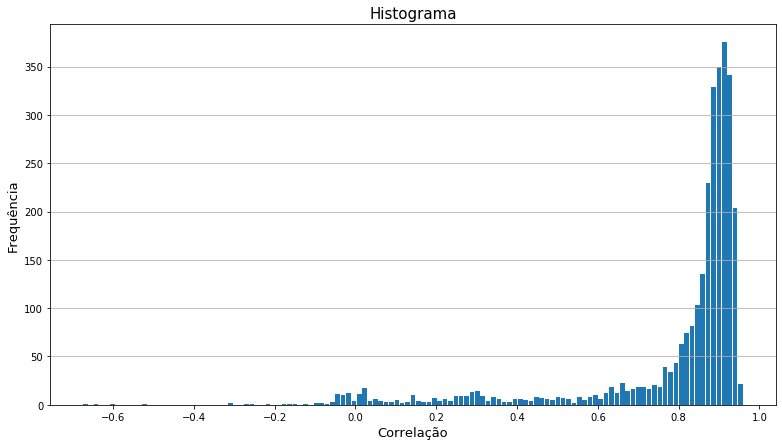

In [5]:
plt.figure(figsize=(13,7))
n, bins, patches = plt.hist(x=r_list, bins='auto',rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Correlação',fontsize=13)
plt.ylabel('Frequência',fontsize=13)
plt.title('Histograma',fontsize=15)

In [6]:
n, bins

(array([  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   2.,
          2.,   1.,   3.,  11.,  10.,  12.,   4.,  11.,  17.,   4.,   6.,
          4.,   3.,   3.,   5.,   2.,   3.,  10.,   4.,   3.,   3.,   7.,
          4.,   6.,   4.,   9.,   9.,   9.,  13.,  14.,   9.,   4.,   8.,
          6.,   3.,   3.,   6.,   6.,   5.,   4.,   8.,   7.,   6.,   5.,
          8.,   7.,   6.,   2.,   8.,   5.,   8.,  10.,   6.,  12.,  18.,
         12.,  23.,  14.,  16.,  18.,  18.,  16.,  21.,  18.,  39.,  34.,
         43.,  63.,  74.,  82., 103., 135., 229., 329., 350., 375., 341.,
        204.,  22.]),
 array([-0.67458375, -0.66130049, -0.64801724, -0.63473398, -0.62145073,
        -0.60816747, -0.59488422, -0.58160096, -0.56831771, -0.55503445,
        -0.5417512

In [7]:
n.max()

375.0

In [8]:
ind = np.argmax(n)
ind

119

In [9]:
bins[ind]

0.9061235797037173